# Simulating Earths Magnetic Field

## Introduction

In this notebook, we will simulate the Earth's magnetic field by applying the theory where Earth's magnetic field is generated by it's liquid core creating circulating electric currents. We will take a surface examination into the Dynamo theory to create the model for our simulation, and inspect it to comment on the applicability of the theory.

## Theory

The scientific community is not in total agreement when it comes to why or how Earth generate it's magnetic field. Over the years, many theories have been proposed to explain how Earth magnetic field is formed. The first known
suggestion of the earth as a giant dipol magnet was published in the year 1600. However, "the dynamo theory", originates from a article publised in 1958 where Earth was modeled as a rotating faraday disc. 

The prominent Dynamo theory describes a process where the conductive fluid materials in Earth's liquid outer core moves in such a pattern that generates the magnetic field, while being self-sustainable. In Earth's case, the main material in question is iron. The electrial conductive iron moves in a rotating pattern that is made possible by Earth's rotation and the Coriolis effect. This force will over time arrange the fluids motion in columns that align with the planet's rotation axis.

These helix-shaped movements can resemble a coil, where the iron acts as the wire. The current flowing in consecutive loops then creates the magnetic field.

Let's take a look at what the dynamo theory is based on. There are two types of electromagnetic generators. An alternator produces an alternating current. And a dynamo, which produces direct current. Although each of the generators produces different types of currents, the concept of how they produce them is the same. An electromagnetic generator consists of a rotating part and a stationary part. The stationary part is made up of a magnet with a distance between the north and south poles of the magnet. The smaller the distance, the greater the magnetic force, but the distance has to be big enough to fit a rotating wire shaped like a U. When the wire is rotating inside the field of the magnetic force, the force makes the electrons inside the wire move. And electrons that are moving are of course electric current. 

A generator uses magnetic forces to generate electric current. The earth's magnetic field is just a reversed generator. It uses electric current, to develop a magnetic field. And that's why it is called the dynamo theory.

## Method

The Dynamo theory suggests to think of Earth's outer core in terms of a multidude of coils. For our model we've decided to approximate this to just one large object. This solenoid simplifies our model, and cuts down significantly on processing power. We expect this to also give us a more readable result as less factors will impend the simualtion.
 
As always, we start with importing the necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Next, we need to define the variables that will make up our solenoid:

In [6]:
mu = 4*np.pi * 1e-7 # (T * m/A)
I = 1.73 * 1e9 # The magnetic suspecitiblity (A)
C = mu*I/(4*np.pi) # The constant used in Bio-Savart's law

R = 1.34 * 1e4  # Radius of loop (m)
W_N = 9.8  # Number of loops of wire
N = 1000 # Number of points on wire
L = 1.28 * 1e8  # height of solenoid (m)

Because of the simplification of our simulation model, we do not need any specific variables. The only thing we need to take into consideration is that the height of the solenoid is longer than the radius of the loops that make up the solenoid.

Then we build the object and plot it to verify it's correct.

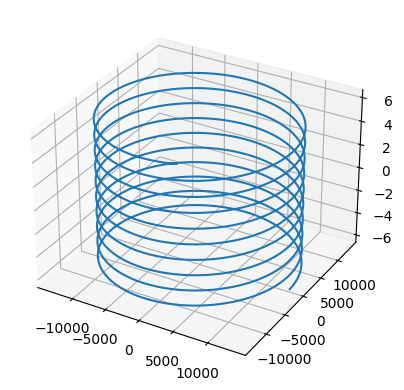

In [7]:
height = np.linspace(-L/2, L/2, N)
theta = np.linspace(0, W_N*2*np.pi, N)
solenoid = np.column_stack([R*np.cos(theta), R*np.sin(theta), height]) 

points = np.array([R*np.cos(theta), R*np.sin(theta), height])  
ax = plt.axes(projection="3d")
ax.plot3D(points[0], points[1], points[2], label='wire')
plt.show ()

To calculate the B-field we can utilize Bio-Savarts law for a point r from a line segment:
$$
dB = \frac{\mu_{0}}{4\pi}\frac{Idl \times \textbf{R}}{R^{3}}
$$
Which we implement as a function:

In [18]:
def bfield(r):
    #Compute the B-field 
    B = 0
    for i in range(N):
        j = i + 1
        if j > N -1:
            j = 0
        rdv = solenoid[i] # Line segment
        R = r - rdv
        dlv = solenoid[j] - solenoid[i]
        dB = np.cross(dlv,R)/np.linalg.norm(R)**3
        B += C * dB
    return B

Next, we need a function where we generate the plane we calculate the B-field for.

In [19]:
def gridlines():
    L = 40
    b = 2 * 1e7
    x = np.linspace(-b,b,L+1)
    z = np.linspace(-b,b,L+1)
    x, z = np.meshgrid(x,z)
    Bx = x.copy()
    Bz = z.copy()
    for ix in range(len(x)):
        for iz in range(len(z)):
            r = np.array([x[ix,iz], 0, z[ix,iz]])
            Bx[ix, iz], By, Bz[ix,iz] = bfield(r)
    return x, z, Bx, Bz

Finally, we want to plot the result.

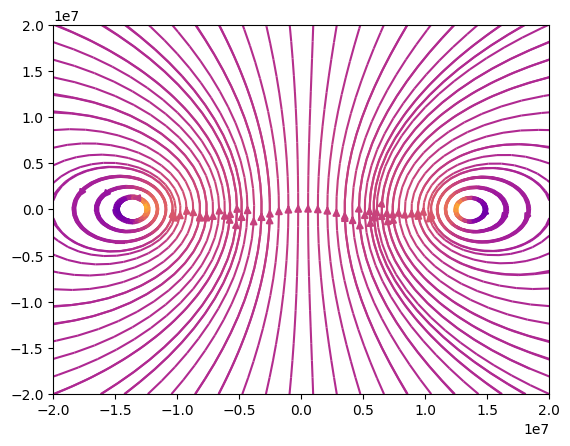

In [20]:
def plot(x, z, Bx, Bz):
    plt.streamplot(x, z, Bx, Bz, broken_streamlines=False, color=Bz, cmap="plasma", density=.75)
    plt.show()

x, z, Bx, Bz = gridlines()
plot(x, z, Bx, Bz)

## Conclusion

As mentioned earlier, our model is extremely simplified. The actual amount of factors influencing Earth's magnetic field is significantly larger then the ones we've chosen to include in this project. Some of the more important assumptions we've made include:
 - Ignoring the misaligned north and south pole relative to the rotation axis.
 - Simplifying the core by neither taking to account the different metals and minerals that compose the core, or the solid inner core.

It is still fair to mention that some of the more complicated simulations are more likely to result in less realistic magnetic fields. Modeling according to the complexity of the system is still limited by today's available computer power. Simple models as the one presented in this project 

## Literature
https://file.scirp.org/Html/11-2180231_79730.htm

https://www.nature.com/articles/ngeo673